In [1]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Step 1: Loading the Dataset

In [2]:
# Upload the dataset file
uploaded = files.upload()

# Load the dataset into a DataFrame
deaths_df = pd.read_csv('/content/time_series_covid19_deaths_global.csv')  # Loading the dataset
deaths_df.head()  # Display the first 5 rows of the dataset


Saving time_series_covid19_deaths_global.csv to time_series_covid19_deaths_global.csv


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


# Step 2: Handling Missing Values


In [3]:
# Check for missing values in the dataset
deaths_df.isnull().sum()

# Fill missing values with 0 (assume missing data means no deaths)
deaths_df.fillna(0, inplace=True)
deaths_df.head()  # Display the first 5 rows after handling missing values



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


# Step 3: Checking for Duplicates


In [4]:
# Find any duplicate rows in the dataset
duplicate_rows = deaths_df[deaths_df.duplicated()]
print(duplicate_rows)  # Should show an empty DataFrame if no duplicates

# Remove duplicates if they exist
deaths_df.drop_duplicates(inplace=True)
deaths_df.head()  # Display the first 5 rows after removing duplicates



Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

[0 rows x 1147 columns]


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


# Step 4: Converting Date Columns to Consistent Format

In [5]:
# Select date columns and convert them to consistent format (YYYY-MM-DD)
data_columns = deaths_df.columns[4:]  # Get the date columns
formatted_date_columns = pd.to_datetime(data_columns, format='%m/%d/%y').strftime('%Y-%m-%d')

# Update the DataFrame with formatted date columns
deaths_df.columns = list(deaths_df.columns[:4]) + list(formatted_date_columns)
deaths_df.head()  # Display the first 5 rows to confirm date format changes



,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


# Step 5: Save the Cleaned Dataset to CSV


In [6]:
deaths_df.to_csv('cleaned_covid19_deaths.csv', index=False)

# Load the cleaned dataset for further analysis
deaths_df_cleaned = pd.read_csv('/content/cleaned_covid19_deaths.csv')
deaths_df_cleaned.head()  # Display the first 5 rows of the cleaned dataset


,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933



# Short summary of the data:

*   The dataset contains COVID-19 death counts from different countries and regions worldwide.
*   Each row represents a specific Province/State and a Country/Region along with their geographical coordinates.

*   The columns labeled with dates show the cumulative number of deaths for each day, starting from January 22, 2020, through to March 9, 2023.
*   The dataset is cleaned, with missing values filled and dates formatted consistently in the YYYY-MM-DD format.







#  Step 6: Calculate Mean and Median of Daily Deaths


In [7]:
# Calculate total daily deaths worldwide (sum across all countries for each day)
daily_deaths = deaths_df_cleaned.iloc[:, 4:].sum()

# Calculate the mean and median daily deaths
mean_daily_deaths = daily_deaths.mean()
median_daily_deaths = daily_deaths.median()

# Print the results
print("Mean daily deaths:", mean_daily_deaths)
print("Median daily deaths:", median_daily_deaths)


Mean daily deaths: 3866856.486439195
Median daily deaths: 4388700.0


# Step 7: Summarizing Daily Deaths


In [8]:
# Display the summarized total daily deaths worldwide
print(daily_deaths)


2020-01-22         17
2020-01-23         18
2020-01-24         26
2020-01-25         42
2020-01-26         56
               ...   
2023-03-05    6877749
2023-03-06    6878115
2023-03-07    6879038
2023-03-08    6880483
2023-03-09    6881802
Length: 1143, dtype: int64


# Step 8: Calculate Daily Increase in Deaths


In [9]:
# Define a function to calculate the daily increase in deaths
def calculate_daily_increase(daily_deaths):
    daily_increase = daily_deaths.diff()  # Calculate the difference between today and yesterday
    return daily_increase

# Calculate the daily increase in deaths
daily_increase_worldwide = calculate_daily_increase(daily_deaths)

# Display the first few rows of daily increase data
print(daily_increase_worldwide.head())



2020-01-22     NaN
2020-01-23     1.0
2020-01-24     8.0
2020-01-25    16.0
2020-01-26    14.0
dtype: float64


# Step 9: Visualizing the Data


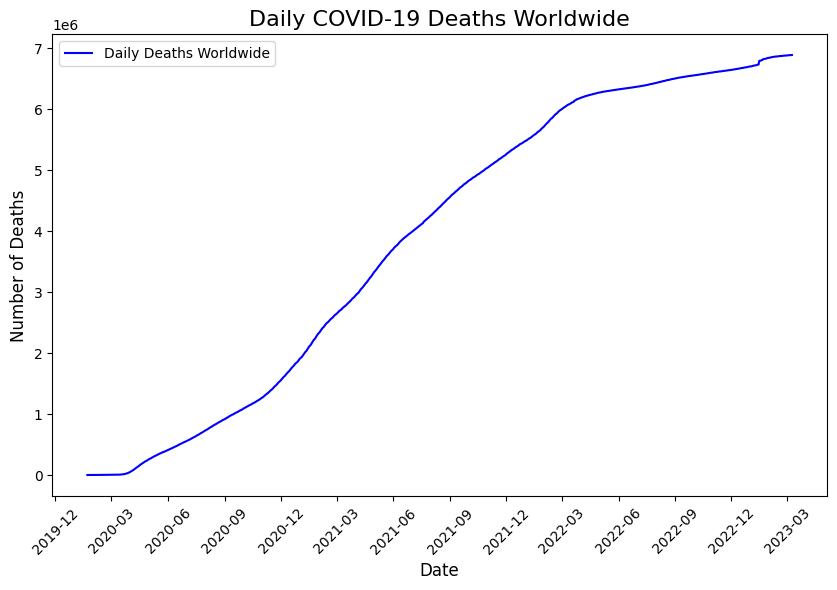

In [10]:
# Ensure that the dates are in a proper format for plotting
date_columns = pd.to_datetime(daily_deaths.index, format='%Y-%m-%d')
daily_deaths.index = date_columns  # Assign the properly formatted date index back

# Create a line plot for daily death cases worldwide
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(daily_deaths, label='Daily Deaths Worldwide', color='b')

# Add title, labels, and format the x-axis for better readability
plt.title('Daily COVID-19 Deaths Worldwide', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)

# Set x-axis ticks to display every 3 months and format them as YYYY-MM
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add a legend and display the plot
plt.legend()
plt.show()
